In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dask import delayed
import seaborn as sns
import scipy.stats as sstats
import glob
from dask import delayed
from time import time
import bottleneck as bn
sns.set(style='whitegrid',font_scale=1.3,context='talk')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# read grid
path = './output_2013asiri_06b/'
zgrid = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)[1][1:51].astype(float)
ds = xr.open_dataset(path+'full_00000.cdf',
                     drop_variables=['conv','conv100','pv','vor','u','v','w',
                                     'consump','tr','s','temp','p','con100','h','xc','yc','zc'])
dz,dy,dx = np.meshgrid(np.diff(zgrid), np.diff(ds.y*1000),np.diff(ds.x*1000), indexing='ij')
jac =  dy*dx*dz

In [69]:
a.shape

(322, 194)

In [66]:
def interpolate_mld(ds,zgrid,x,y):
    from scipy import interpolate
    foo = xr.DataArray(ds.rho, coords=[zgrid, ds.y, ds.x], dims=['z', 'y', 'x'])
    dss = xr.Dataset({'rho':foo})
    
    # find density at 10m
    a = dss.rho.interp(x=dss.x,y=dss.y,z=-10) 
    
    # find mixed layer depth surface
    zz,yy,xx = np.meshgrid(dss.z,dss.y,dss.x,indexing='ij')
    rho1 = np.max(np.ma.masked_where(dss.rho < (a.values + 0.03),dss.rho), axis=0)
    rho2 = np.min(np.ma.masked_where(dss.rho > (a.values + 0.03),dss.rho), axis=0)
    z1 = np.max(np.ma.masked_where(dss.rho < (a.values + 0.03),zz), axis=0)
    z2 = np.min(np.ma.masked_where(dss.rho > (a.values + 0.03),zz), axis=0)
    w1=(rho1- (a.values + 0.03))/(rho1-rho2)
    w2= 1-wt1
    mld = z1*w2 + z2*w1
    
    # make interpolant
    f = interpolate.interp2d(dss.x,dss.y,mld)
    
    # query interpolant
    return f(x,y)

In [67]:
interpolate_mld(ds,zgrid,10,10)

array([-24.46138632])

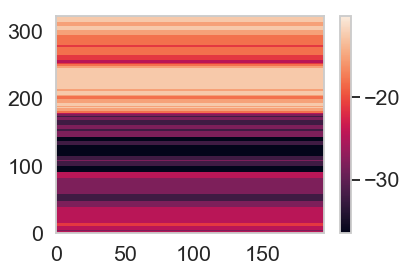

In [57]:
plt.pcolor(mld)
plt.colorbar()
plt.show()

In [58]:
from scipy import interpolate

In [60]:
f = interpolate.interp2d(dss.x,dss.y,mld)

In [63]:
f([20,30,40],[120.130,140]).shape

(2, 3)